In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

%matplotlib inline 

# Part a)

In [32]:
def low_rank_approximation(X, rank):
    # YOUR CODE GOES HERE
    u, s, vt = np.linalg.svd(X)
    s[rank:] = 0
    s = np.vstack((np.diag(s), np.zeros((u.shape[1]-s.shape[0], vt.shape[0]))))
    return u@s@vt

In [31]:
u, s, vt = np.linalg.svd(face)
s[5:] = 0
s = np.vstack((np.diag(s), np.zeros((u.shape[1]-s.shape[0], vt.shape[0]))))
result = u@s@vt
u.shape,s.shape,vt.shape

((330, 330), (330, 280), (280, 280))

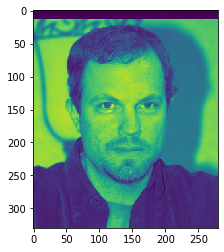

In [36]:
# original picture
face = imread("./data/face.jpg")
plt.imshow(face)
plt.show()

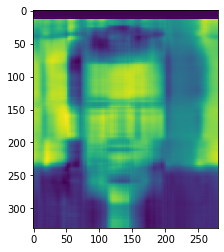

In [33]:
# rank = 5
face_rank5 = low_rank_approximation(face, 5)
plt.imshow(face_rank5)
plt.show()

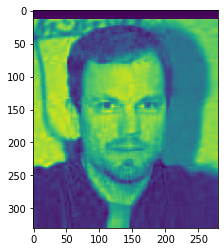

In [34]:
# rank = 20
face_rank20 = low_rank_approximation(face, 20)
plt.imshow(face_rank20)
plt.show()

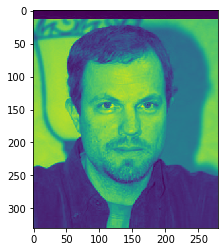

In [35]:
# rank = 100
face_rank100 = low_rank_approximation(face, 100)
plt.imshow(face_rank100)
plt.show()

# Part b)

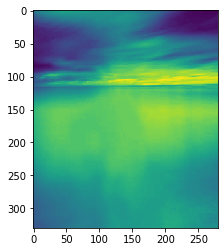

In [38]:
# original picture
sky = imread("./data/sky.jpg")
plt.imshow(sky)
plt.show()

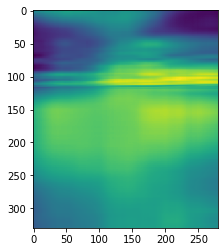

In [42]:
# rank = 5
sky_rank5 = low_rank_approximation(sky, 5)
plt.imshow(sky_rank5)
plt.show()

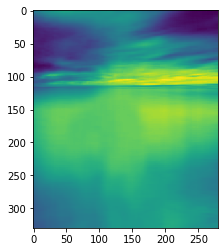

In [43]:
# rank = 20
sky_rank20 = low_rank_approximation(sky, 20)
plt.imshow(sky_rank20)
plt.show()

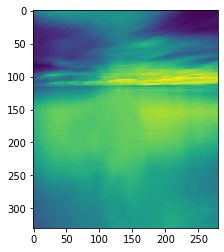

In [44]:
# rank = 100
sky_rank100 = low_rank_approximation(sky, 100)
plt.imshow(sky_rank100)
plt.show()

# Part c)

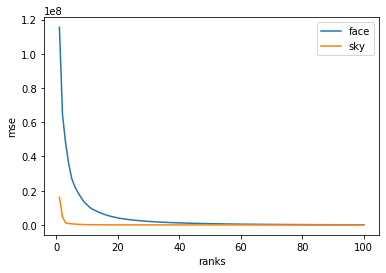

<Figure size 432x288 with 0 Axes>

In [53]:
def mse(img1, img2):
    # YOUR CODE GOES HERE
    face_MSE = []
    sky_MSE = []
    for i, r in enumerate(range(1,101)):
        face_rank = low_rank_approximation(img1, r)
        sky_rank = low_rank_approximation(img2, r)
        face_MSE.append(np.sum(np.square(face_rank-img1)))
        sky_MSE.append(np.sum(np.square(sky_rank-img2)))
    plt.plot(range(1,101), face_MSE,label = 'face')
    plt.plot(range(1,101), sky_MSE,label = 'sky')
    plt.xlabel('ranks')
    plt.ylabel('mse')
    plt.legend()
    plt.show()
    
mse(face, sky)
plt.savefig('mse.png')

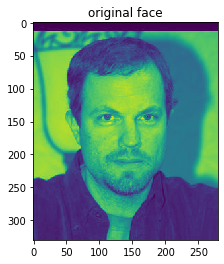

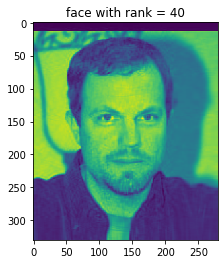

In [64]:
plt.imshow(face)
plt.title('original face')
plt.show()

face_rank100 = low_rank_approximation(face, 40)
plt.imshow(face_rank100)
plt.title('face with rank = 40')
plt.show()

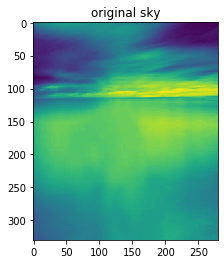

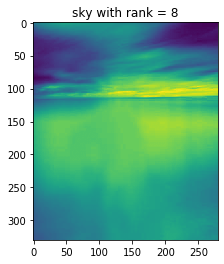

In [63]:
plt.imshow(sky)
plt.title('original sky')
plt.show()

face_rank100 = low_rank_approximation(sky, 8)
plt.imshow(sky_rank100)
plt.title('sky with rank = 8')
plt.show()

### (d) The lowest rank approximation of face is 40, the lowest rank approximation of sky is 8. The reason is that face picture has more details than sky picture, which need more components to approximate.